In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import glob
import pandas as pd
import numpy as np
import py2edw

import operator
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
init_notebook_mode(connected=True)

from tqdm._tqdm_notebook import tqdm_notebook as tqdm
tqdm.pandas()

In [2]:
df = pd.read_csv('DBSCAN_eps-1_ms-5_results.csv')

In [3]:
labels = sorted(df['label'].unique())

In [4]:
cust = pd.read_csv('all_customer_info.csv')

In [5]:
states = cust['state'].unique()

In [6]:
combined = df.merge(cust, on=['customer_id'])

# States

In [33]:
label_state = combined.groupby(['label','state'], as_index=False).agg({'customer_id':'count'})

In [34]:
len(states)/4

15.0

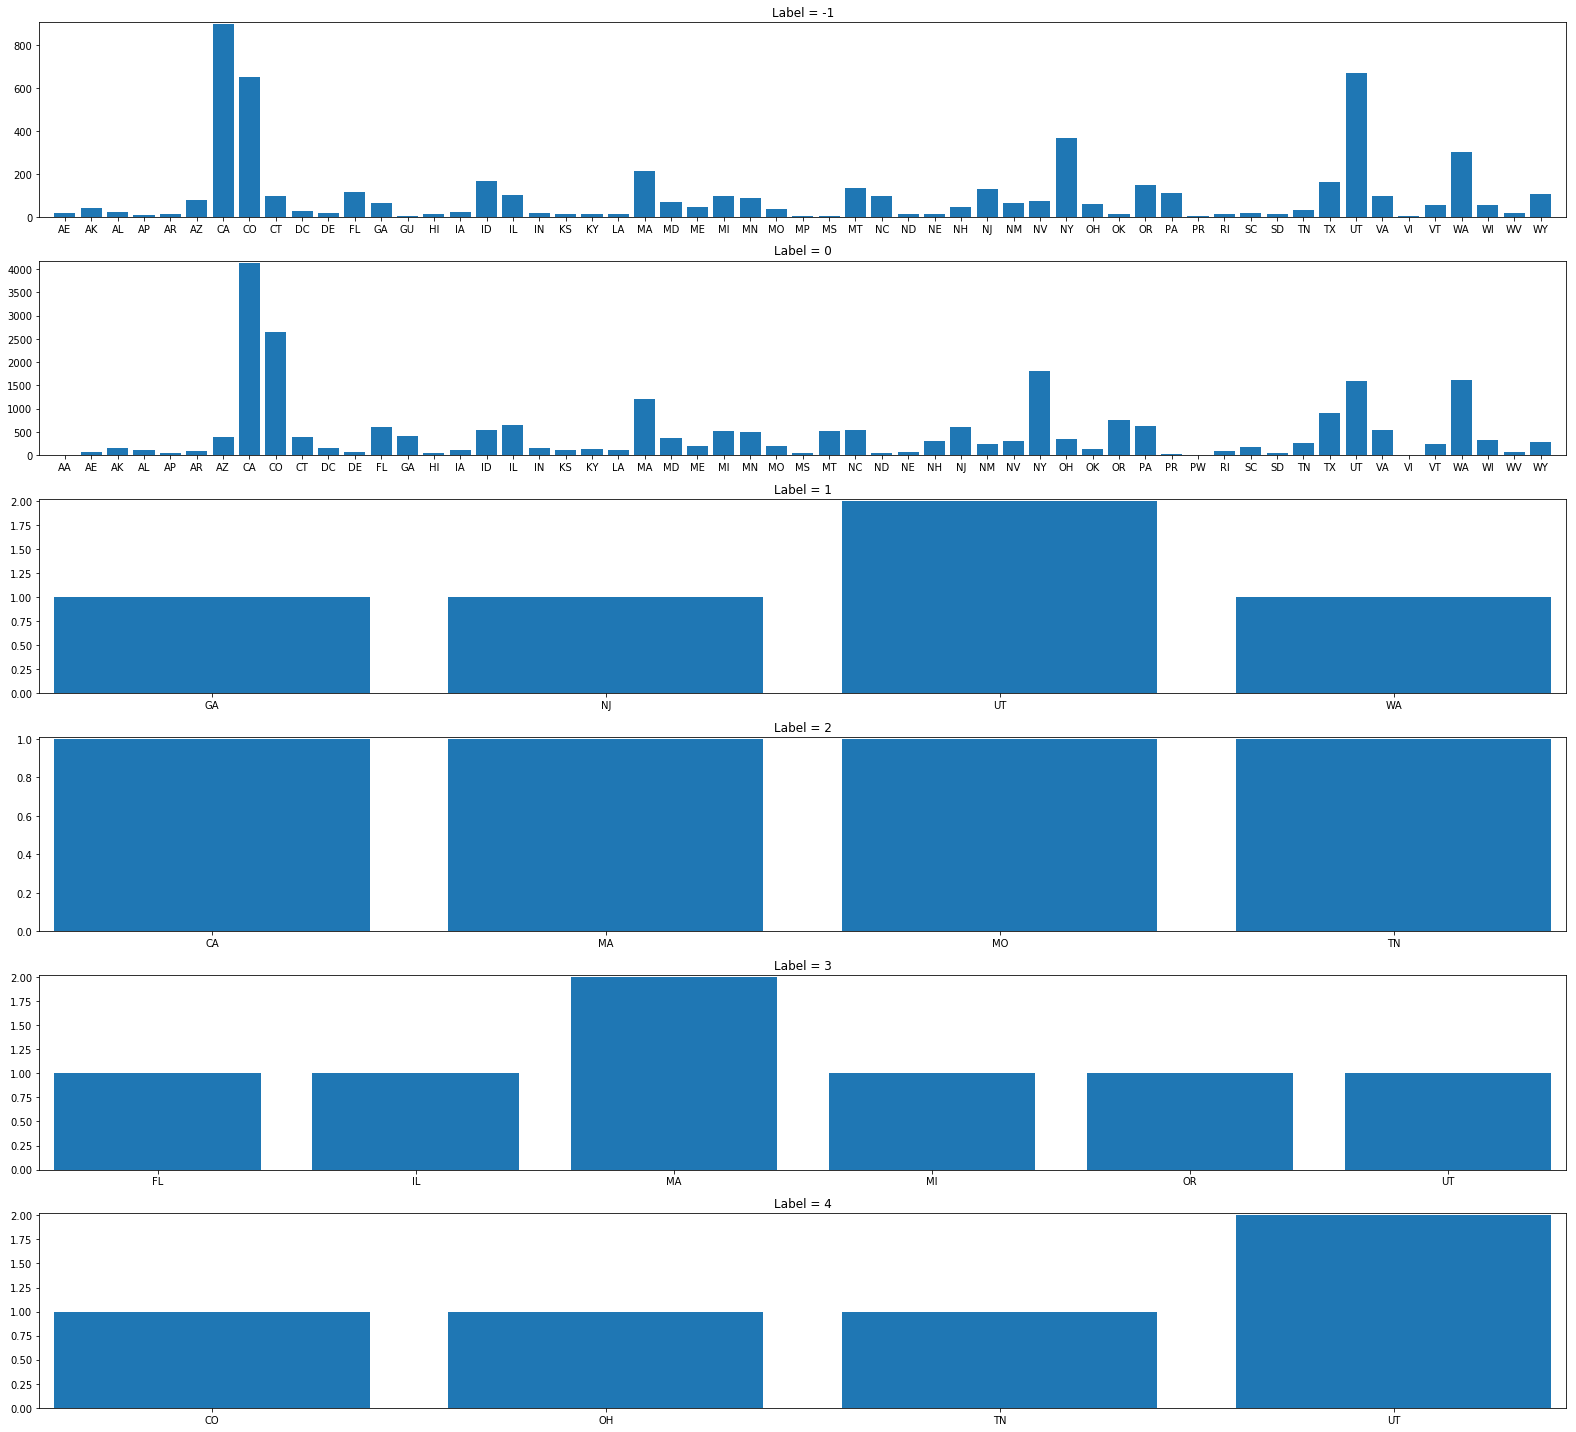

In [35]:
fig = plt.figure(figsize=(22,20))
for i in range(len(labels)):
    ax = fig.add_subplot(6, 1, i+1) 
    data = label_state[label_state.label==labels[i]].drop('label', axis=1)
    plt.bar(data.state,data.customer_id)
    ax.set_title('Label = {}'.format(labels[i]))
    plt.tight_layout()
    plt.margins(0.01)
    plt.savefig("{}.jpg".format('cluster_by_state'),  format='jpg', dpi=200)

# Aggregated Data

In [34]:
combined_sum = combined.groupby('label').agg({i: 'sum' for i in combined.columns if i not in['customer_id','country','state','zip','label']}).drop(-1)

In [35]:
combined_avg = combined.groupby('label').agg({i: 'mean' for i in combined.columns if i not in['customer_id','country','state','zip','label']}).drop(-1)

# Sales and Orders

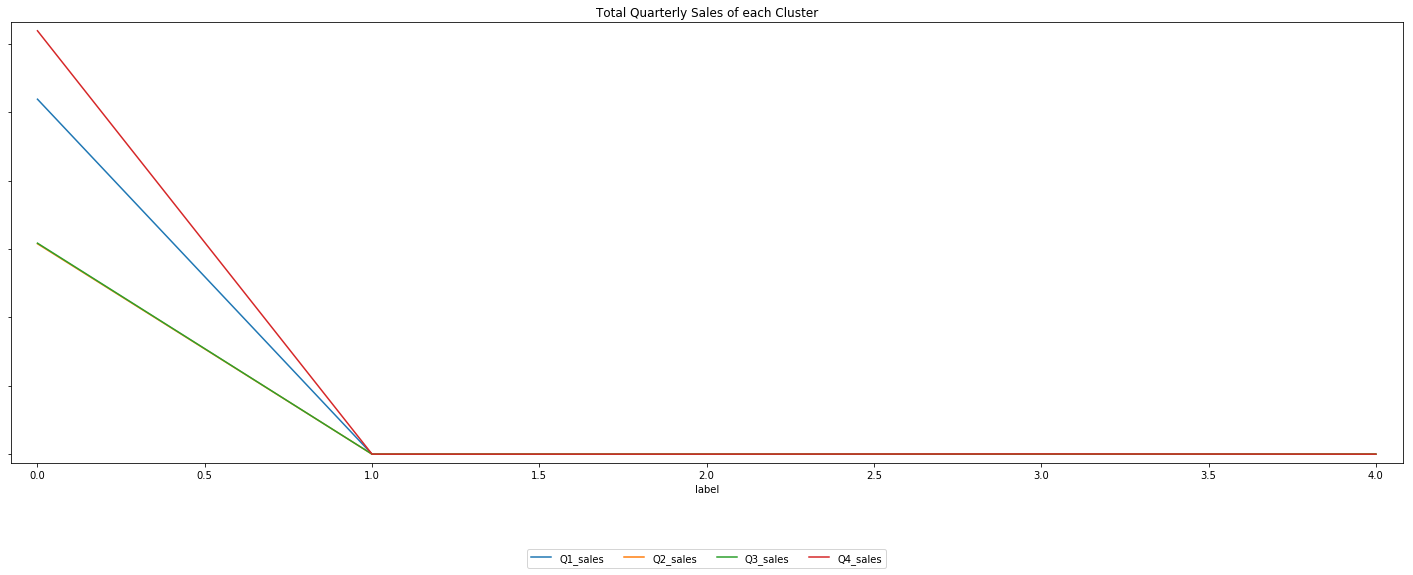

In [36]:
ax = combined_sum[[i for i in combined_sum.columns if 'sales' in i]].plot(figsize=(20,7))
_ = plt.tight_layout()
_ = plt.margins(0.02)
_ = plt.legend(ncol=15, loc='lower center', bbox_to_anchor=(0.5, -0.25))
_ = plt.title('Total Quarterly Sales of each Cluster')
_ = ax.set_yticklabels([])

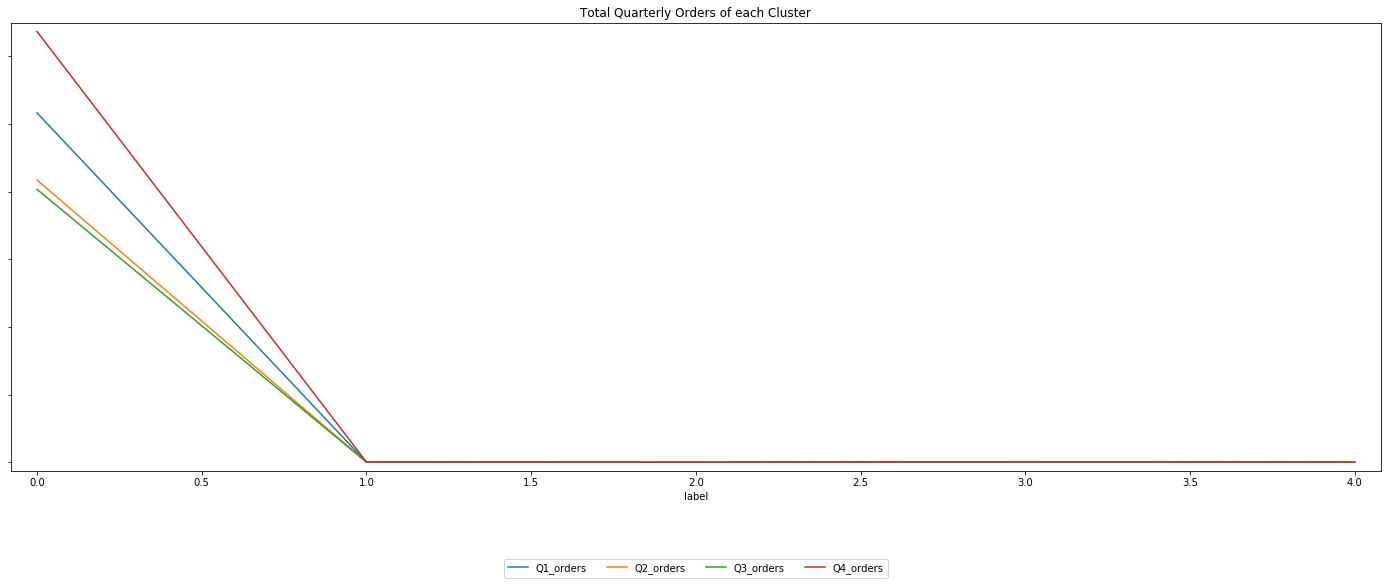

In [37]:
ax = combined_sum[[i for i in combined_sum.columns if 'order' in i]].plot(figsize=(20,7))
_ = plt.tight_layout()
_ = plt.margins(0.02)
_ = plt.legend(ncol=15, loc='lower center', bbox_to_anchor=(0.5, -0.25))
_ = plt.title('Total Quarterly Orders of each Cluster')
_ = ax.set_yticklabels([])

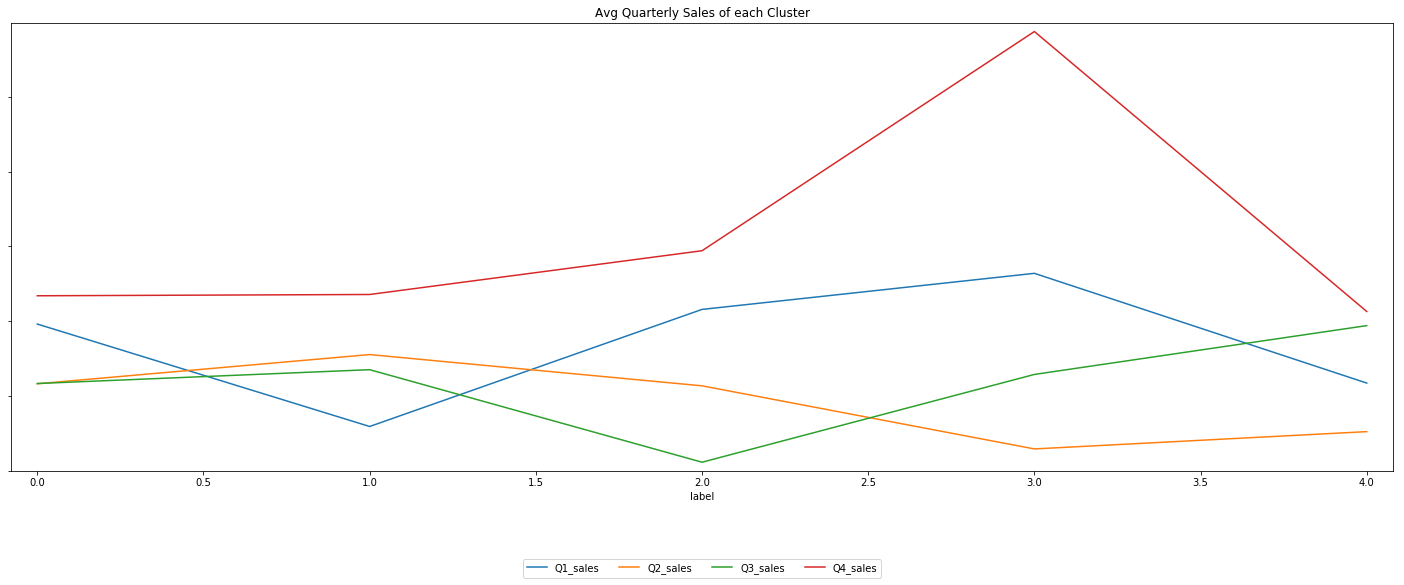

In [38]:
ax = combined_avg[[i for i in combined_sum.columns if 'sales' in i]].plot(figsize=(20,7))
_ = plt.tight_layout()
_ = plt.margins(0.02)
_ = plt.legend(ncol=15, loc='lower center', bbox_to_anchor=(0.5, -0.25))
_ = plt.title('Avg Quarterly Sales of each Cluster')
_ = ax.set_yticklabels([])

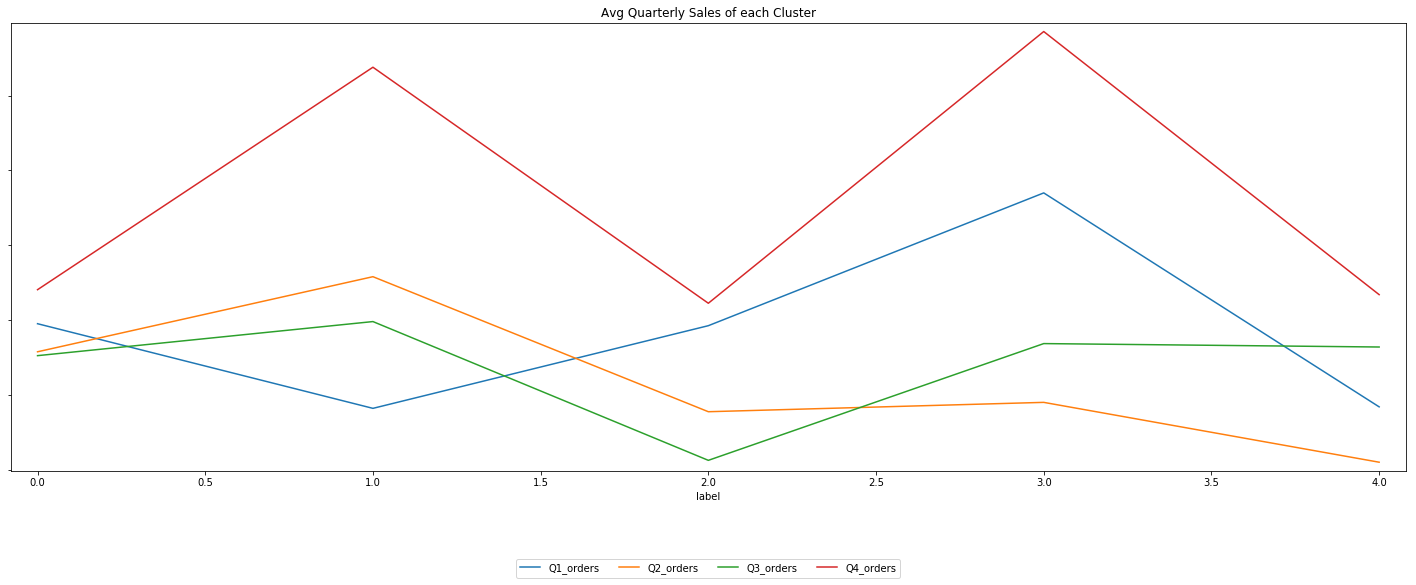

In [40]:
ax = combined_avg[[i for i in combined_sum.columns if 'orders' in i]].plot(figsize=(20,7))
_ = plt.tight_layout()
_ = plt.margins(0.02)
_ = plt.legend(ncol=15, loc='lower center', bbox_to_anchor=(0.5, -0.25))
_ = plt.title('Avg Quarterly Sales of each Cluster')
_ = ax.set_yticklabels([])

# Product Type

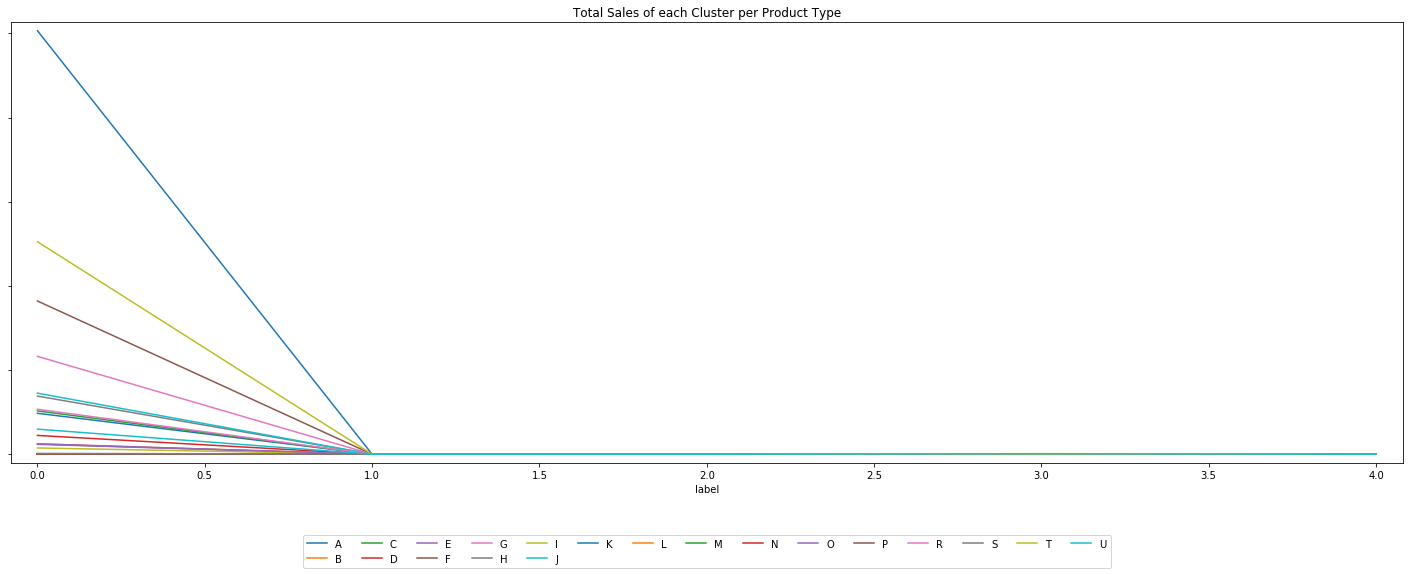

In [41]:
ax = combined_sum[[i for i in combined_sum.columns if 'Q' not in i]].plot(figsize=(20,7))
_ = plt.tight_layout()
_ = plt.margins(0.02)
_ = plt.legend(ncol=15, loc='lower center', bbox_to_anchor=(0.5, -0.25))
_ = plt.title('Total Sales of each Cluster per Product Type')
_ = ax.set_yticklabels([])

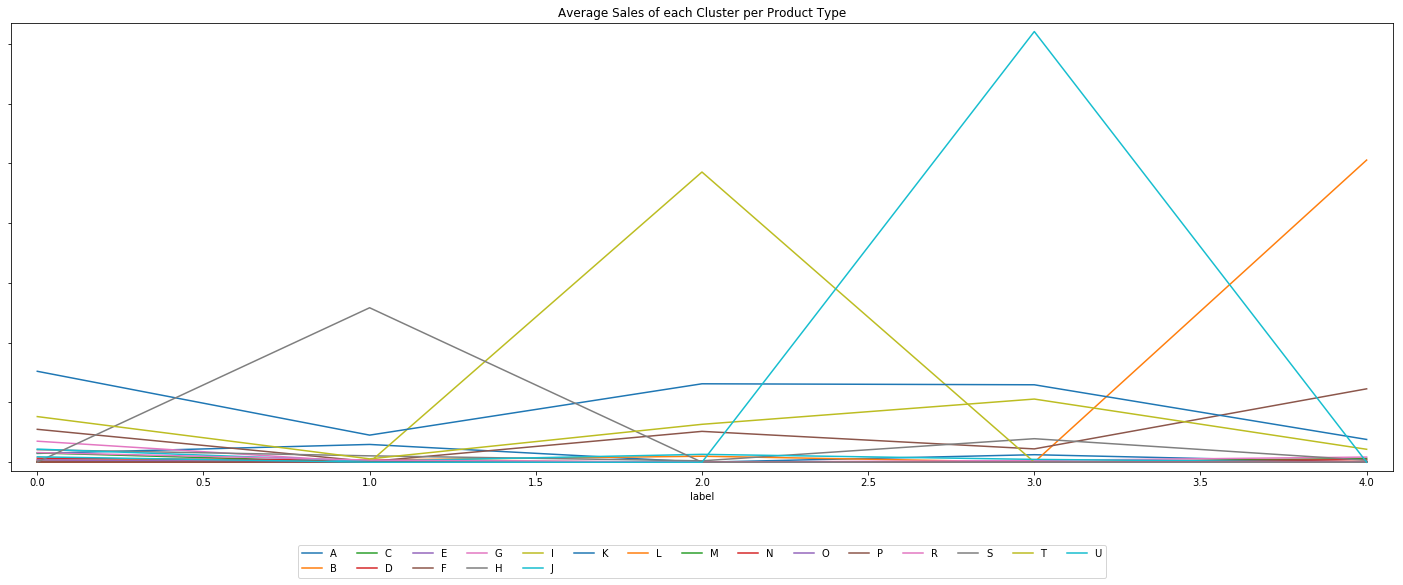

In [42]:
ax = combined_avg[[i for i in combined_sum.columns if 'Q' not in i]].plot(figsize=(20,7))
_ = plt.tight_layout()
_ = plt.margins(0.02)
_ = plt.legend(ncol=15, loc='lower center', bbox_to_anchor=(0.5, -0.25))
_ = plt.title('Average Sales of each Cluster per Product Type')
_ = ax.set_yticklabels([])